# Project 1: Kyushu Land Cover 2015 and 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

## Plotting the change bar graph

In [2]:
# Pixel count for each class from QGIS raster report. Each pixel is 100mx100m
pix_2015 = np.array([3418293, 658843, 23106])
pix_2019 = np.array([3413545, 660904, 25793])

# Area for each class (km^2)
area_2015 = pix_2015 * 0.01
area_2019 = pix_2019 * 0.01

total_changes = area_2019 - area_2015 # f-i

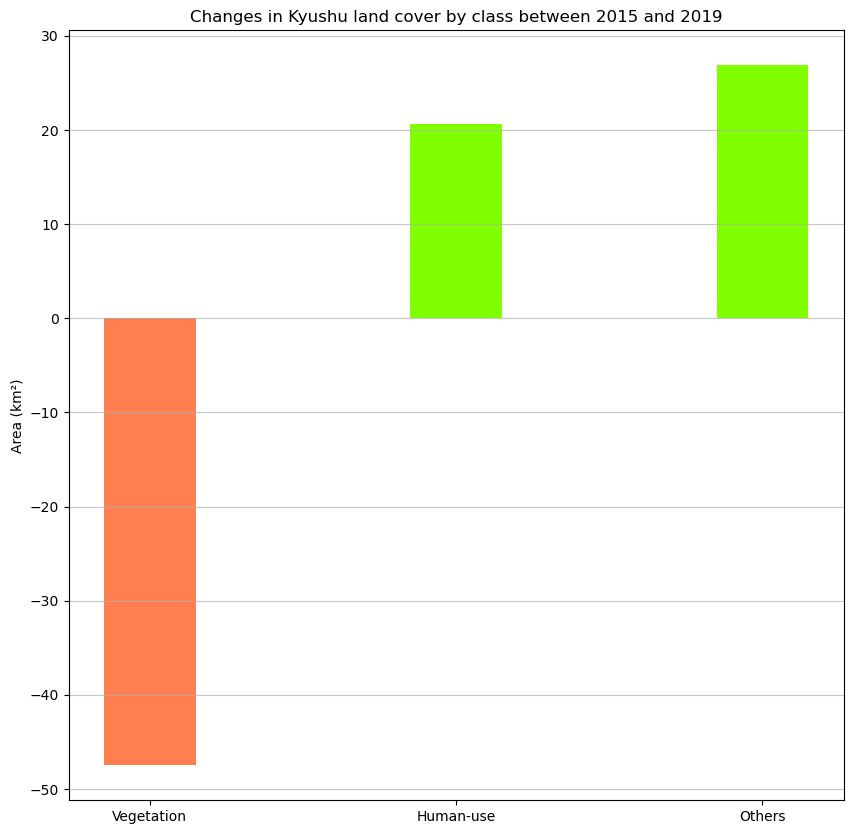

[-47.48  20.61  26.87]


In [3]:
# Plotting the bar graphs
categories = ['Vegetation', 'Human-use', 'Others']
axis = np.arange(len(categories))
bar_width = 0.3
colors = ['coral' if val < 0 else 'chartreuse' for val in total_changes]

plt.rcParams['figure.figsize'] = 10,10
plt.bar(axis, total_changes, width=bar_width, color = colors)

plt.ylabel('Area (km²)')
plt.title('Changes in Kyushu land cover by class between 2015 and 2019')
plt.xticks(axis, categories)
plt.grid(True, axis='y', alpha=0.7)
plt.show()

print(total_changes)

## Alternative: Using Rasterio to calculate changes

In [4]:
with rasterio.open('Kyushu_ReClassified_2015.tif') as Kyushu_2015:
    Kyushu_2015_1 = Kyushu_2015.read(1)  # Read Band 1
    profile = Kyushu_2015.profile # Storing the metadata of the raster file

with rasterio.open('Kyushu_ReClassified_2019.tif') as Kyushu_2019:
    Kyushu_2019_1 = Kyushu_2019.read(1)  

In [5]:
# Obtaining the number of pixels in each class
# x[x>0] to only select classes that aren't empty areas (-9999)
classes_2015, counts_2015 = np.unique(Kyushu_2015_1[Kyushu_2015_1 > 0], return_counts=True)
classes_2019, counts_2019 = np.unique(Kyushu_2019_1[Kyushu_2019_1 > 0], return_counts=True)

# Finding the area from pixel counts and resolution
transform = profile["transform"]
pix_width = transform[0] # X resolution (deg)
pix_height = abs(transform[4]) # Y resolution (deg)

# Converting degree to km
deg_to_km = 111.32 # km, At equator
latitude = 32.59 # For Kyushu
area_width = pix_width * deg_to_km * np.cos(np.radians(latitude))
area_length = pix_height * deg_to_km

pix_area_km_sq = area_width * area_length

area_2015 = (counts_2015 * pix_area_km_sq)[0:-1]
area_2019 = (counts_2019 * pix_area_km_sq)[0:-1]

# Subtracting 2019-2015 to find changes
lc_changes = area_2019 - area_2015

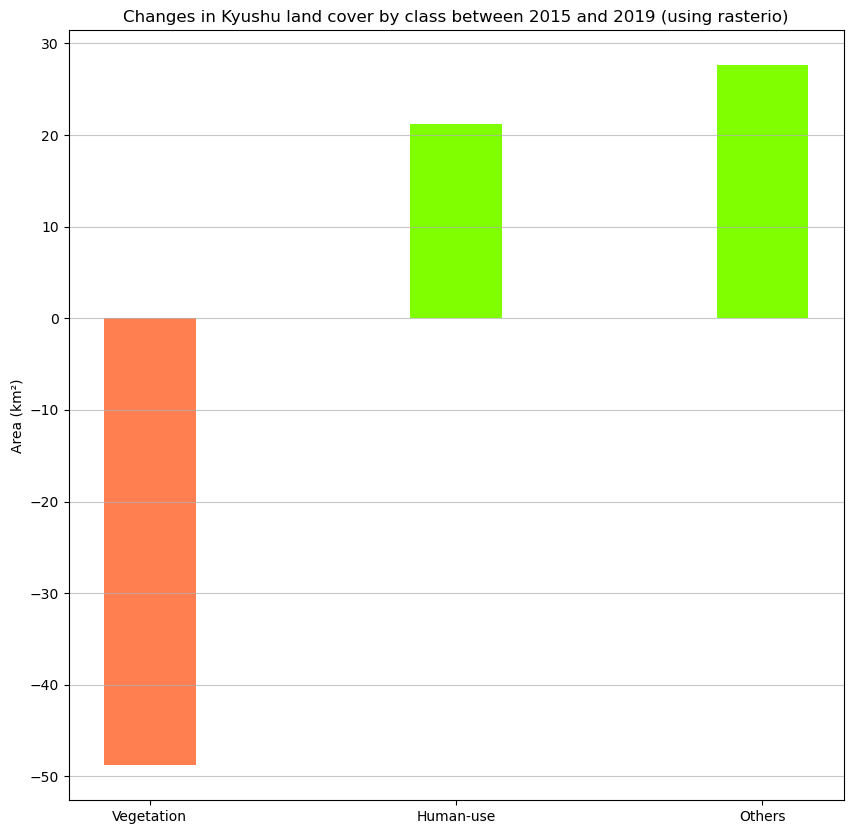

[-48.78989435  21.17859567  27.61129868]


In [6]:
# Plotting the bar graphs
plt.rcParams['figure.figsize'] = 10,10
plt.bar(axis, lc_changes, width=bar_width, color = colors)

plt.ylabel('Area (km²)')
plt.title('Changes in Kyushu land cover by class between 2015 and 2019 (using rasterio)')
plt.xticks(axis, categories)
plt.grid(True, axis='y', alpha=0.7)
plt.show()

print(lc_changes)